In [0]:

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
from sklearn.datasets import load_digits
import sklearn.datasets
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection 

In [2]:
numeros = sklearn.datasets.load_digits()
X = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
Y = numeros['target']
print(np.shape(X))
print (type(X))

(1797, 8, 8)
<class 'numpy.ndarray'>


In [3]:
#Estandarizamos los datos
scaler = sklearn.preprocessing.StandardScaler()
x_train=torch.from_numpy(X).float()
mean = x_train.mean(dim=0)
std = x_train.std(dim=0)
std[std==0]=1.0

for i in range(len(x_train)):
    x_train[i] = (x_train[i]-mean)/std
x_train = x_train.unsqueeze(1)
print(np.shape(x_train))

torch.Size([1797, 1, 8, 8])


In [0]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 50, kernel_size=3, stride=1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(50,40,kernel_size=1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(40,30,kernel_size=1),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(
            torch.nn.Conv2d(30,40,kernel_size=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(40,50,kernel_size=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(50,1,kernel_size=3, stride=1),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.008, weight_decay=1.7E-3)

In [0]:
#Loss lista
lloss=np.zeros(num_epochs)
# entrenamiento
for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    lloss[epoch]=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Text(0, 0.5, 'Loss')

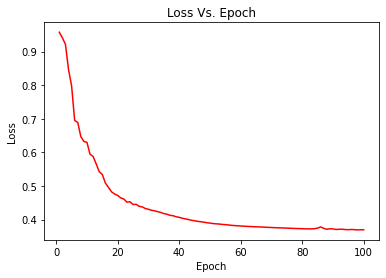

In [10]:
plt.plot(np.arange(1,101),lloss, 'r')
plt.title('Loss Vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [0]:
x_transform = model(x_train)
latent_space = model.encoder(x_train)

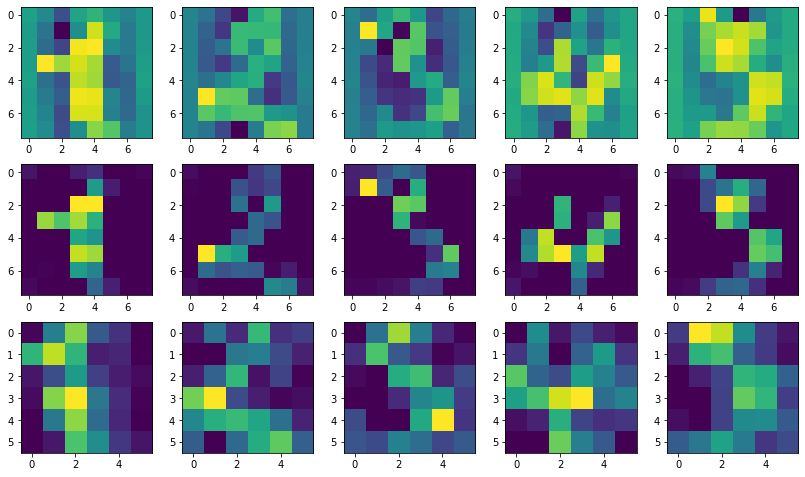

In [16]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 1
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(x_train[i+offset][0].detach().numpy())
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())
